In [6]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import statsmodels.api as sm

In [7]:
stock_data = pd.read_csv("DowJones.csv", parse_dates=True, index_col=0)
stock_data

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2022-05-26,32638.44,32263.33,32773.26,32263.33,33895000000,0.02
2022-05-25,32121.53,31816.31,32254.29,31754.33,33313000000,0.01
2022-05-24,31931.06,31717.61,32014.86,31367.33,37385000000,0.00
2022-05-23,31880.64,31497.56,31968.42,31484.02,38926000000,0.02
2022-05-20,31260.58,31426.94,31514.07,30635.76,47903000000,0.00
...,...,...,...,...,...,...
2018-03-05,23930.15,23836.23,23996.15,23531.31,38924000000,0.00
2018-02-05,23924.98,24097.63,24185.52,23886.30,38535000000,-0.01
2018-01-05,24099.05,24117.29,24117.29,23808.19,38007000000,0.00


<AxesSubplot:ylabel='Density'>

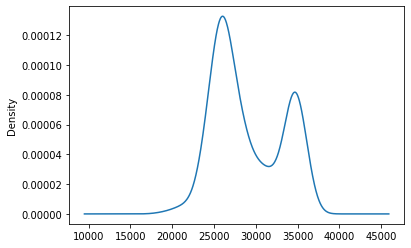

In [8]:
#Distribution of the dataset
df_close = stock_data['Close']
df_close.plot(kind='kde')

Test Statistics                  -1.235679
p-value                           0.658062
No. of lags used                  9.000000
Number of observations used    1019.000000
critical value (1%)              -3.436784
critical value (5%)              -2.864381
critical value (10%)             -2.568282
dtype: float64


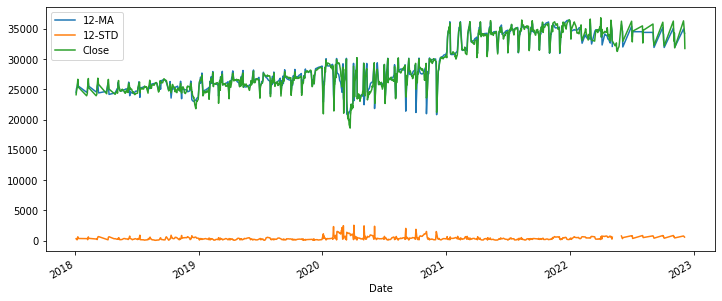

In [9]:
#Test for staionarity
def test_stationarity(timeseries):
    # show plot of MA and STD
    stock_data['12-MA'] = df_close.rolling(window=12).mean()
    stock_data['12-STD']  = df_close.rolling(window=12).std()
    stock_data[['12-MA','12-STD','Close']].plot(figsize=(12,5))
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

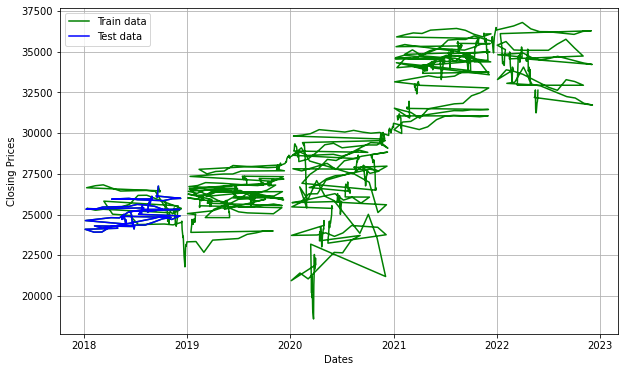

In [10]:
train_data, test_data = df_close[3:int(len(df_close)*0.9)], df_close[int(len(df_close)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_close, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Test Statistics                  -1.235679
p-value                           0.658062
No. of lags used                  9.000000
Number of observations used    1019.000000
critical value (1%)              -3.436784
critical value (5%)              -2.864381
critical value (10%)             -2.568282
dtype: float64


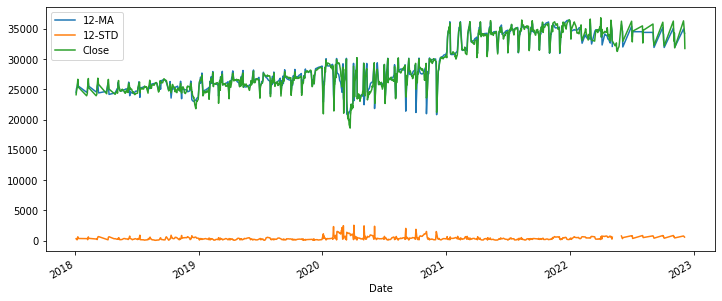

In [11]:
#Test for staionarity
def test_stationarity(timeseries):
    # show plot of MA and STD
    stock_data['12-MA'] = df_close.rolling(window=12).mean()
    stock_data['12-STD']  = df_close.rolling(window=12).std()
    stock_data[['12-MA','12-STD','Close']].plot(figsize=(12,5))
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

In [12]:
#Modeling
# Build Model
model = sm.tsa.SARIMAX(train_data, order=(2,1,2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  923
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -6730.496
Date:                Fri, 27 May 2022   AIC                          13470.991
Time:                        08:52:38   BIC                          13495.124
Sample:                             0   HQIC                         13480.200
                                - 923                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7194      0.028    -61.341      0.000      -1.774      -1.664
ar.L2         -0.8575      0.028    -30.894      0.000      -0.912      -0.803
ma.L1          1.5979      0.040     40.141      0.0

In [13]:
len(test_data)

103

In [15]:

fc, se, conf= fitted.forecast(36, alpha=0.05)  # 95% conf
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('ARCH CAPITAL GROUP Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ARCH CAPITAL GROUP Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

ValueError: too many values to unpack (expected 3)

In [ ]:
fc=  fitted.forecast(36, alpha=0.05)  # 95% conf
conf = 0.95
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('ARCH CAPITAL GROUP Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ARCH CAPITAL GROUP Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

TypeError: 'float' object is not subscriptable

In [ ]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = sm.tsa.SARIMAX(train_data, order=(2, 1, 2))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(119, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

ValueError: too many values to unpack (expected 3)